In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
####se sube: fallecidos_covid19.xlsx
from google.colab import files

uploaded = files.upload()

Saving fallecidos_covid19.xlsx to fallecidos_covid19.xlsx


In [3]:
data = pd.read_excel('fallecidos_covid19.xlsx',sheet_name='Sheet1')

In [4]:
data


,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,Year,Month,Day,contar_fall,METODODX,contar_pos,Riesgo_distrito
0,AMAZONAS,BAGUA,BAGUA,FEMENINO,2020,7,20,1,PR,4,4
1,AMAZONAS,BAGUA,BAGUA,MASCULINO,2021,4,23,2,PR,1,4
2,AMAZONAS,UTCUBAMBA,BAGUA GRANDE,MASCULINO,2021,2,3,1,PR,1,4
3,ANCASH,CASMA,CASMA,MASCULINO,2020,5,8,1,PR,2,3
4,ANCASH,CASMA,CASMA,MASCULINO,2021,4,7,1,PR,1,2
...,...,...,...,...,...,...,...,...,...,...,...
44196,UCAYALI,CORONEL PORTILLO,MANANTAY,FEMENINO,2021,4,8,3,AG,1,2
44197,UCAYALI,CORONEL PORTILLO,MANANTAY,MASCULINO,2020,6,1,1,PR,13,2
44198,UCAYALI,CORONEL PORTILLO,YARINACOCHA,FEMENINO,2020,5,6,5,PR,4,3
44199,UCAYALI,CORONEL PORTILLO,YARINACOCHA,FEMENINO,2020,10,11,1,PR,2,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44201 entries, 0 to 44200
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DEPARTAMENTO     44201 non-null  object
 1   PROVINCIA        44201 non-null  object
 2   DISTRITO         44201 non-null  object
 3   SEXO             44201 non-null  object
 4   Year             44201 non-null  int64 
 5   Month            44201 non-null  int64 
 6   Day              44201 non-null  int64 
 7   contar_fall      44201 non-null  int64 
 8   METODODX         44201 non-null  object
 9   contar_pos       44201 non-null  int64 
 10  Riesgo_distrito  44201 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 3.7+ MB


In [7]:
#### torta para atributo cualitativo nominal con labels
super=pd.value_counts(data['DEPARTAMENTO'])
print(super)
print(type(super))

AREQUIPA         4424
PIURA            4204
LA LIBERTAD      3575
JUNIN            3271
ICA              2987
LAMBAYEQUE       2967
LIMA REGION      2800
CALLAO           2623
ANCASH           2358
CUSCO            2034
CAJAMARCA        1577
LORETO           1358
SAN MARTIN       1266
PUNO             1252
UCAYALI          1246
TACNA            1025
HUANUCO           978
AYACUCHO          789
MOQUEGUA          673
APURIMAC          585
TUMBES            573
AMAZONAS          508
PASCO             396
MADRE DE DIOS     378
HUANCAVELICA      354
Name: DEPARTAMENTO, dtype: int64
<class 'pandas.core.series.Series'>


In [11]:
super=pd.DataFrame(super)
super.columns=["Frec_abs"]
super["Frec_rel_%"]=100*super["Frec_abs"]/len(data)
valor_ac=0
Frec_rel_val=super["Frec_rel_%"].values
for i in Frec_rel_val:
    valor_ac=valor_ac+i
super

,Frec_abs,Frec_rel_%
AREQUIPA,4424,10.008823
PIURA,4204,9.511097
LA LIBERTAD,3575,8.088052
JUNIN,3271,7.400285
ICA,2987,6.757766
LAMBAYEQUE,2967,6.712518
LIMA REGION,2800,6.334698
CALLAO,2623,5.934255
ANCASH,2358,5.334721
CUSCO,2034,4.601706


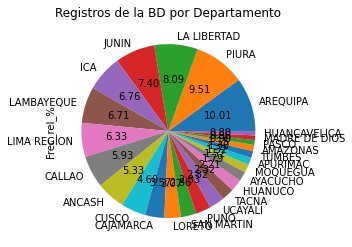

In [12]:
super['Frec_rel_%'].plot(
  kind='pie', 
 #labels = ['Life Sciences', 'Medical','Marketing','Technical Degree','Other','Human Resources'],
  autopct='%.2f', 
  title='Registros de la BD por Departamento')

In [10]:
pivot_dpto_fall = data.groupby(['DEPARTAMENTO']).agg({'contar_fall':'sum'}).reset_index()
pivot_dpto_fall
print(type(pivot_dpto_fall))
print(pivot_dpto_fall)


<class 'pandas.core.frame.DataFrame'>
     DEPARTAMENTO  contar_fall
0        AMAZONAS          634
1          ANCASH         5164
2        APURIMAC          754
3        AREQUIPA         7913
4        AYACUCHO         1147
5       CAJAMARCA         3072
6          CALLAO        10396
7           CUSCO         3085
8    HUANCAVELICA          448
9         HUANUCO         1509
10            ICA         5726
11          JUNIN         5445
12    LA LIBERTAD         8677
13     LAMBAYEQUE         6840
14    LIMA REGION         4290
15         LORETO         3209
16  MADRE DE DIOS          662
17       MOQUEGUA         1281
18          PASCO          442
19          PIURA         8506
20           PUNO         2584
21     SAN MARTIN         1849
22          TACNA         1669
23         TUMBES          909
24        UCAYALI         2814


In [15]:
pivot_dpto_fall["contar_fall"]

0       634
1      5164
2       754
3      7913
4      1147
5      3072
6     10396
7      3085
8       448
9      1509
10     5726
11     5445
12     8677
13     6840
14     4290
15     3209
16      662
17     1281
18      442
19     8506
20     2584
21     1849
22     1669
23      909
24     2814
Name: contar_fall, dtype: int64

In [17]:
suma = pivot_dpto_fall["contar_fall"].sum()
suma

89025

In [18]:
suma = pivot_dpto_fall["contar_fall"].sum()
pivot_dpto_fall["Frec_rel_%"]=100*pivot_dpto_fall["contar_fall"]/suma
pivot_dpto_fall

,DEPARTAMENTO,contar_fall,Frec_rel_%
0,AMAZONAS,634,0.712160
1,ANCASH,5164,5.800618
2,APURIMAC,754,0.846953
3,AREQUIPA,7913,8.888514
4,AYACUCHO,1147,1.288402
5,CAJAMARCA,3072,3.450716
6,CALLAO,10396,11.677619
7,CUSCO,3085,3.465319
8,HUANCAVELICA,448,0.503229
9,HUANUCO,1509,1.695029


In [19]:
valor_ac=0
Frec_rel_val=pivot_dpto_fall["Frec_rel_%"].values
for i in Frec_rel_val:
    valor_ac=valor_ac+i
print(valor_ac)

99.99999999999997


In [21]:
pivot_dpto_fall.index = pivot_dpto_fall['DEPARTAMENTO']
pivot_dpto_fall

,DEPARTAMENTO,contar_fall,Frec_rel_%
DEPARTAMENTO,,,
AMAZONAS,AMAZONAS,634,0.712160
ANCASH,ANCASH,5164,5.800618
APURIMAC,APURIMAC,754,0.846953
AREQUIPA,AREQUIPA,7913,8.888514
AYACUCHO,AYACUCHO,1147,1.288402
CAJAMARCA,CAJAMARCA,3072,3.450716
CALLAO,CALLAO,10396,11.677619
CUSCO,CUSCO,3085,3.465319
HUANCAVELICA,HUANCAVELICA,448,0.503229


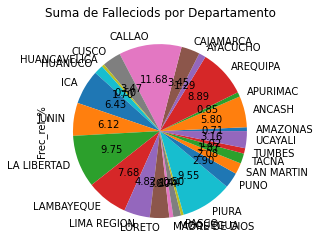

In [22]:
pivot_dpto_fall['Frec_rel_%'].plot(
  kind='pie', 
 #labels = ['Life Sciences', 'Medical','Marketing','Technical Degree','Other','Human Resources'],
  autopct='%.2f', 
  title='Suma de Falleciods por Departamento')

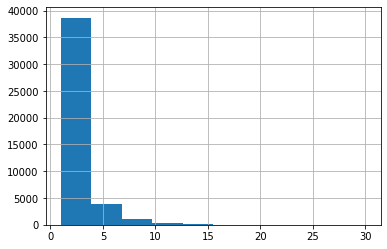

In [23]:
data['contar_fall'].hist()

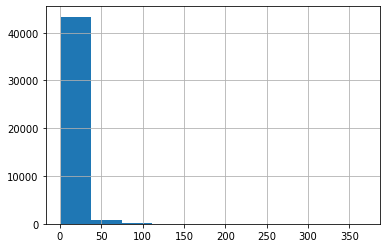

In [24]:
data['contar_pos'].hist()

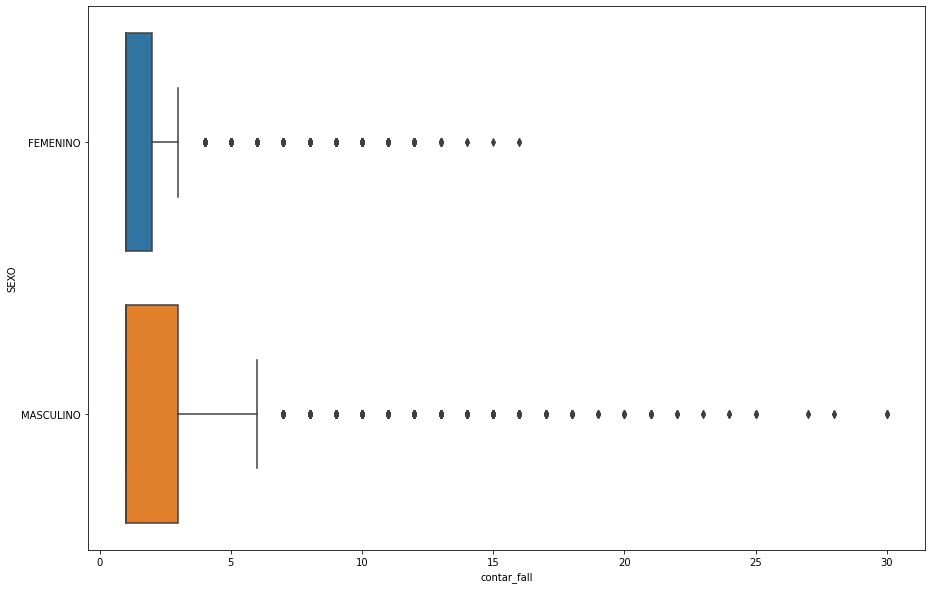

In [25]:
# Veamos el Gender vs. contar_fall
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'contar_fall', y = 'SEXO', data = data)

# **Resultados:** Los varones presentan temporadas en la cuales tienen un conteo de fallecidos mucho mayor que el de mujeres fallecidas.

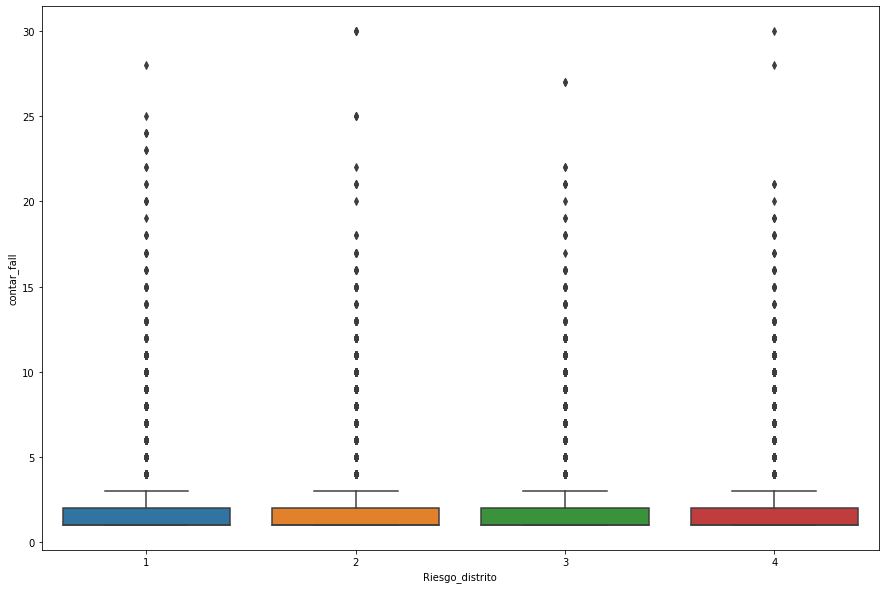

In [26]:
plt.figure(figsize=(15, 10))
sns.boxplot(y = 'contar_fall', x = 'Riesgo_distrito', data = data)

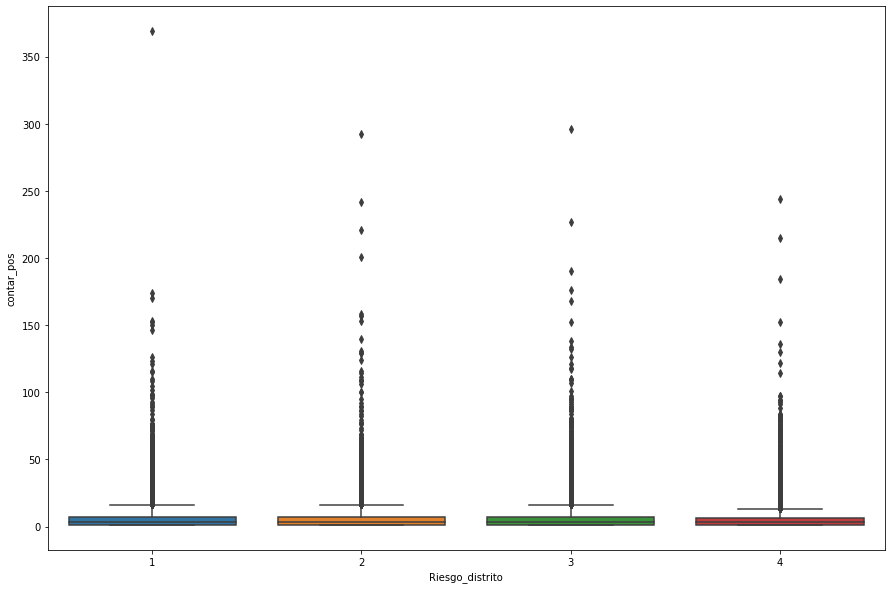

In [27]:
plt.figure(figsize=(15, 10))
sns.boxplot(y = 'contar_pos', x = 'Riesgo_distrito', data = data)

# **Paso 2:** Codificación

## DEPARTAMENTO

In [28]:
data.columns

Index(['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'SEXO', 'Year', 'Month', 'Day',
       'contar_fall', 'METODODX', 'contar_pos', 'Riesgo_distrito'],
      dtype='object')

In [29]:
labels = data['DEPARTAMENTO'].astype('category').cat.categories.tolist()
print(labels)
print(type(labels))

['AMAZONAS', 'ANCASH', 'APURIMAC', 'AREQUIPA', 'AYACUCHO', 'CAJAMARCA', 'CALLAO', 'CUSCO', 'HUANCAVELICA', 'HUANUCO', 'ICA', 'JUNIN', 'LA LIBERTAD', 'LAMBAYEQUE', 'LIMA REGION', 'LORETO', 'MADRE DE DIOS', 'MOQUEGUA', 'PASCO', 'PIURA', 'PUNO', 'SAN MARTIN', 'TACNA', 'TUMBES', 'UCAYALI']
<class 'list'>


In [30]:
replace_map_comp = {'DEPARTAMENTO' : {k: v for k,v in zip(labels,list(range(0,len(labels)+1)))}}
print(replace_map_comp)
print(type(replace_map_comp))

{'DEPARTAMENTO': {'AMAZONAS': 0, 'ANCASH': 1, 'APURIMAC': 2, 'AREQUIPA': 3, 'AYACUCHO': 4, 'CAJAMARCA': 5, 'CALLAO': 6, 'CUSCO': 7, 'HUANCAVELICA': 8, 'HUANUCO': 9, 'ICA': 10, 'JUNIN': 11, 'LA LIBERTAD': 12, 'LAMBAYEQUE': 13, 'LIMA REGION': 14, 'LORETO': 15, 'MADRE DE DIOS': 16, 'MOQUEGUA': 17, 'PASCO': 18, 'PIURA': 19, 'PUNO': 20, 'SAN MARTIN': 21, 'TACNA': 22, 'TUMBES': 23, 'UCAYALI': 24}}
<class 'dict'>


In [31]:
data2 = data.copy()
data2.replace(replace_map_comp, inplace=True)
data2

,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,Year,Month,Day,contar_fall,METODODX,contar_pos,Riesgo_distrito
0,0,BAGUA,BAGUA,FEMENINO,2020,7,20,1,PR,4,4
1,0,BAGUA,BAGUA,MASCULINO,2021,4,23,2,PR,1,4
2,0,UTCUBAMBA,BAGUA GRANDE,MASCULINO,2021,2,3,1,PR,1,4
3,1,CASMA,CASMA,MASCULINO,2020,5,8,1,PR,2,3
4,1,CASMA,CASMA,MASCULINO,2021,4,7,1,PR,1,2
...,...,...,...,...,...,...,...,...,...,...,...
44196,24,CORONEL PORTILLO,MANANTAY,FEMENINO,2021,4,8,3,AG,1,2
44197,24,CORONEL PORTILLO,MANANTAY,MASCULINO,2020,6,1,1,PR,13,2
44198,24,CORONEL PORTILLO,YARINACOCHA,FEMENINO,2020,5,6,5,PR,4,3
44199,24,CORONEL PORTILLO,YARINACOCHA,FEMENINO,2020,10,11,1,PR,2,4


## *PROVINCIA*

In [32]:
labels = data2['PROVINCIA'].astype('category').cat.categories.tolist()
replace_map_comp = {'PROVINCIA' : {k: v for k,v in zip(labels,list(range(0,len(labels)+1)))}}
print(replace_map_comp)
data3 = data2.copy()
data3.replace(replace_map_comp, inplace=True)
data3.head()

{'PROVINCIA': {'ABANCAY': 0, 'ACOBAMBA': 1, 'AIJA': 2, 'ALTO AMAZONAS': 3, 'AMBO': 4, 'ANDAHUAYLAS': 5, 'ANGARAES': 6, 'ANTA': 7, 'ANTABAMBA': 8, 'ANTONIO RAIMONDI': 9, 'AREQUIPA': 10, 'ASCOPE': 11, 'ATALAYA': 12, 'AYABACA': 13, 'AYMARAES': 14, 'AZANGARO': 15, 'BAGUA': 16, 'BARRANCA': 17, 'BELLAVISTA': 18, 'BOLIVAR': 19, 'BOLOGNESI': 20, 'BONGARA': 21, 'CAJABAMBA': 22, 'CAJAMARCA': 23, 'CAJATAMBO': 24, 'CALCA': 25, 'CALLAO': 26, 'CAMANA': 27, 'CANAS': 28, 'CANCHIS': 29, 'CANDARAVE': 30, 'CANGALLO': 31, 'CANTA': 32, 'CARABAYA': 33, 'CARAVELI': 34, 'CARHUAZ': 35, 'CASMA': 36, 'CASTILLA': 37, 'CASTROVIRREYNA': 38, 'CAYLLOMA': 39, 'CAÑETE': 40, 'CELENDIN': 41, 'CHACHAPOYAS': 42, 'CHANCHAMAYO': 43, 'CHEPEN': 44, 'CHICLAYO': 45, 'CHINCHA': 46, 'CHINCHEROS': 47, 'CHOTA': 48, 'CHUCUITO': 49, 'CHUMBIVILCAS': 50, 'CHUPACA': 51, 'CHURCAMPA': 52, 'CONCEPCION': 53, 'CONDESUYOS': 54, 'CONDORCANQUI': 55, 'CONTRALMIRANTE VILLAR': 56, 'CONTUMAZA': 57, 'CORONEL PORTILLO': 58, 'COTABAMBAS': 59, 'CUSCO': 

,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,Year,Month,Day,contar_fall,METODODX,contar_pos,Riesgo_distrito
0,0,16,BAGUA,FEMENINO,2020,7,20,1,PR,4,4
1,0,16,BAGUA,MASCULINO,2021,4,23,2,PR,1,4
2,0,176,BAGUA GRANDE,MASCULINO,2021,2,3,1,PR,1,4
3,1,36,CASMA,MASCULINO,2020,5,8,1,PR,2,3
4,1,36,CASMA,MASCULINO,2021,4,7,1,PR,1,2


## DISTRITO

In [33]:
labels = data3['DISTRITO'].astype('category').cat.categories.tolist()
replace_map_comp = {'DISTRITO' : {k: v for k,v in zip(labels,list(range(0,len(labels)+1)))}}
print(replace_map_comp)
data4 = data3.copy()
data4.replace(replace_map_comp, inplace=True)
data4.head()

{'DISTRITO': {'ABANCAY': 0, 'ACARI': 1, 'ACAS': 2, 'ACOBAMBA': 3, 'ACOCRO': 4, 'ACOLLA': 5, 'ACOPAMPA': 6, 'ACORA': 7, 'ACORIA': 8, 'ACRAQUIA': 9, 'AGALLPAMPA': 10, 'AGUA BLANCA': 11, 'AGUAS VERDES': 12, 'AHUAC': 13, 'AHUAYCHA': 14, 'ALEXANDER VON HUMBOLDT': 15, 'ALONSO DE ALVARADO': 16, 'ALTO DE LA ALIANZA': 17, 'ALTO LARAN': 18, 'ALTO NANAY': 19, 'ALTO SELVA ALEGRE': 20, 'AMARILIS': 21, 'AMBO': 22, 'AMOTAPE': 23, 'ANANEA': 24, 'ANCAHUASI': 25, 'ANCHIHUAY': 26, 'ANCHONGA': 27, 'ANCO': 28, 'ANDABAMBA': 29, 'ANDAHUAYLAS': 30, 'ANDAHUAYLILLAS': 31, 'ANDAMARCA': 32, 'ANDARAPA': 33, 'ANDOAS': 34, 'ANDRES AVELINO CACERES D.': 35, 'ANGUIA': 36, 'ANTA': 37, 'ANTABAMBA': 38, 'ANTAUTA': 39, 'APATA': 40, 'APLAO': 41, 'ARAMANGO': 42, 'AREQUIPA': 43, 'ASCENSION': 44, 'ASCOPE': 45, 'ASIA': 46, 'ASILLO': 47, 'ATAURA': 48, 'ATAVILLOS BAJO': 49, 'ATICO': 50, 'AUCALLAMA': 51, 'AWAJUN': 52, 'AYABACA': 53, 'AYACUCHO': 54, 'AYAPATA': 55, 'AYAVIRI': 56, 'AYNA': 57, 'AZANGARO': 58, 'BAGUA': 59, 'BAGUA GRAND

,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,Year,Month,Day,contar_fall,METODODX,contar_pos,Riesgo_distrito
0,0,16,59,FEMENINO,2020,7,20,1,PR,4,4
1,0,16,59,MASCULINO,2021,4,23,2,PR,1,4
2,0,176,60,MASCULINO,2021,2,3,1,PR,1,4
3,1,36,115,MASCULINO,2020,5,8,1,PR,2,3
4,1,36,115,MASCULINO,2021,4,7,1,PR,1,2


## SEXO

In [34]:
labels = data4['SEXO'].astype('category').cat.categories.tolist()
replace_map_comp = {'SEXO' : {k: v for k,v in zip(labels,list(range(0,len(labels)+1)))}}
print(replace_map_comp)
data5 = data4.copy()
data5.replace(replace_map_comp, inplace=True)
data5.head()

{'SEXO': {'FEMENINO': 0, 'MASCULINO': 1}}


,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,Year,Month,Day,contar_fall,METODODX,contar_pos,Riesgo_distrito
0,0,16,59,0,2020,7,20,1,PR,4,4
1,0,16,59,1,2021,4,23,2,PR,1,4
2,0,176,60,1,2021,2,3,1,PR,1,4
3,1,36,115,1,2020,5,8,1,PR,2,3
4,1,36,115,1,2021,4,7,1,PR,1,2


## METODODX

In [35]:
labels = data5['METODODX'].astype('category').cat.categories.tolist()
replace_map_comp = {'METODODX' : {k: v for k,v in zip(labels,list(range(0,len(labels)+1)))}}
print(replace_map_comp)
data6 = data5.copy()
data6.replace(replace_map_comp, inplace=True)
data6.head()

{'METODODX': {'AG': 0, 'PR': 1}}


,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,Year,Month,Day,contar_fall,METODODX,contar_pos,Riesgo_distrito
0,0,16,59,0,2020,7,20,1,1,4,4
1,0,16,59,1,2021,4,23,2,1,1,4
2,0,176,60,1,2021,2,3,1,1,1,4
3,1,36,115,1,2020,5,8,1,1,2,3
4,1,36,115,1,2021,4,7,1,1,1,2


## Riesgo_distrito

In [36]:
labels = data6['Riesgo_distrito'].astype('category').cat.categories.tolist()
replace_map_comp = {'Riesgo_distrito' : {k: v for k,v in zip(labels,list(range(0,len(labels)+1)))}}
print(replace_map_comp)
data7 = data6.copy()
data7.replace(replace_map_comp, inplace=True)
data7.head()

{'Riesgo_distrito': {1: 0, 2: 1, 3: 2, 4: 3}}


,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,Year,Month,Day,contar_fall,METODODX,contar_pos,Riesgo_distrito
0,0,16,59,0,2020,7,20,1,1,4,3
1,0,16,59,1,2021,4,23,2,1,1,3
2,0,176,60,1,2021,2,3,1,1,1,3
3,1,36,115,1,2020,5,8,1,1,2,2
4,1,36,115,1,2021,4,7,1,1,1,1


In [37]:
from google.colab import files

In [44]:
data7.to_excel ('fallecidos_covid19_COD.xlsx') 
files.download('fallecidos_covid19_COD.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Paso 3: EDA Parte 2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa0b586a90>,
      dtype=object)

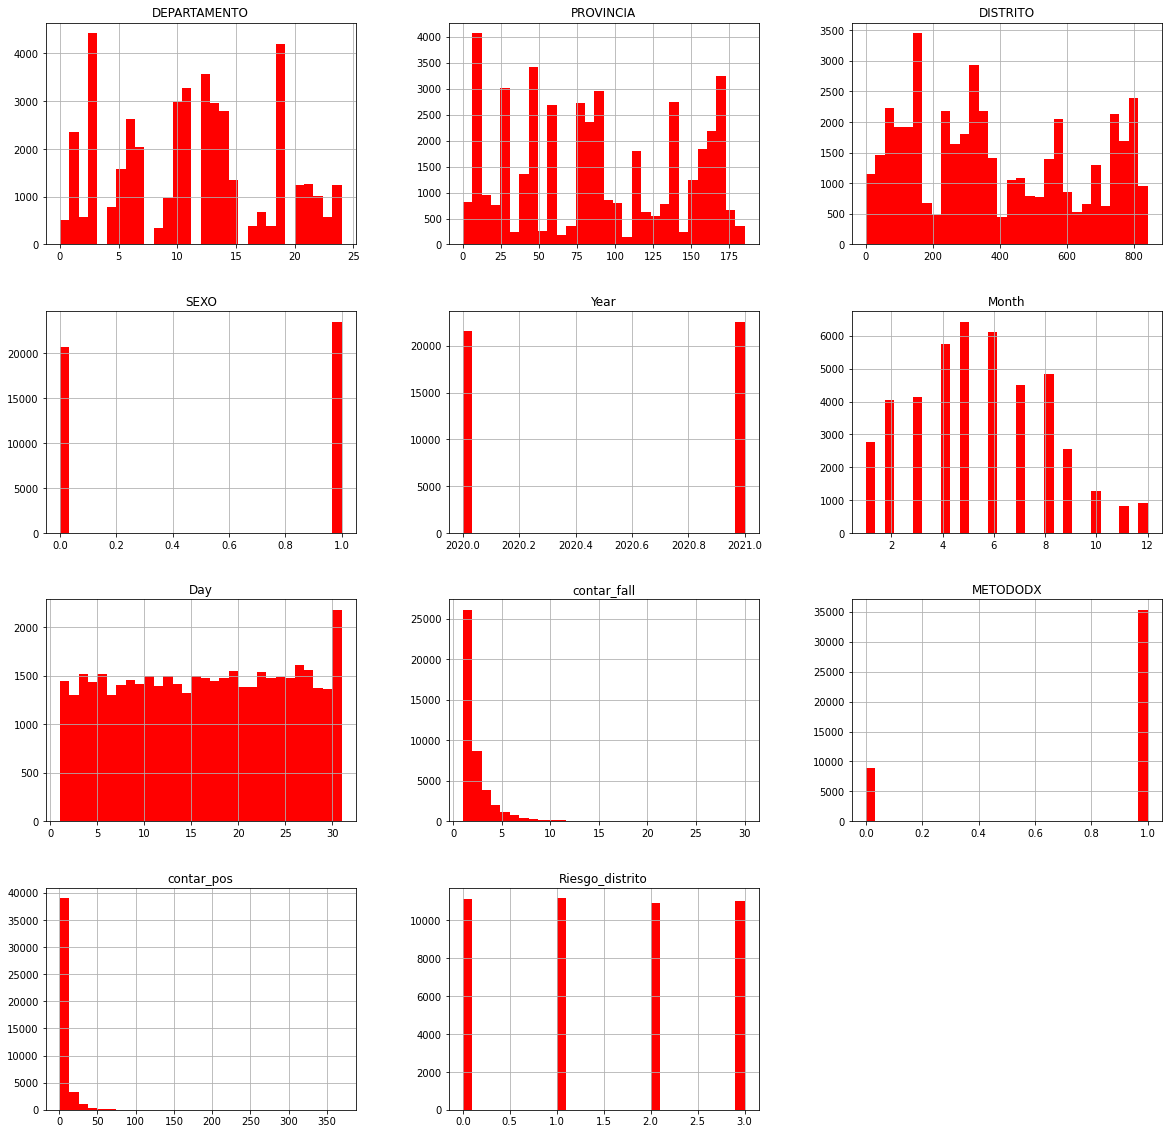

In [39]:
######actividad: 
data7.hist(bins = 30, figsize=(20,20), color = 'r')

In [40]:
data7.describe()

,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,Year,Month,Day,contar_fall,METODODX,contar_pos,Riesgo_distrito
count,44201.000000,44201.000000,44201.000000,44201.000000,44201.000000,44201.000000,44201.000000,44201.000000,44201.000000,44201.000000,44201.000000
mean,11.268863,87.494536,389.449153,0.531753,2020.510848,5.459492,15.860659,2.014095,0.798104,6.268908,1.493337
std,6.483294,54.604713,249.244269,0.498996,0.499888,2.641368,8.789915,1.977751,0.401419,10.858368,1.118502
min,0.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,6.000000,43.000000,161.000000,0.000000,2020.000000,4.000000,8.000000,1.000000,1.000000,1.000000,0.000000
50%,11.000000,83.000000,343.000000,1.000000,2021.000000,5.000000,16.000000,1.000000,1.000000,3.000000,1.000000
75%,15.000000,136.000000,590.000000,1.000000,2021.000000,7.000000,23.000000,2.000000,1.000000,7.000000,2.000000
max,24.000000,185.000000,841.000000,1.000000,2021.000000,12.000000,31.000000,30.000000,1.000000,369.000000,3.000000


In [41]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44201 entries, 0 to 44200
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   DEPARTAMENTO     44201 non-null  int64
 1   PROVINCIA        44201 non-null  int64
 2   DISTRITO         44201 non-null  int64
 3   SEXO             44201 non-null  int64
 4   Year             44201 non-null  int64
 5   Month            44201 non-null  int64
 6   Day              44201 non-null  int64
 7   contar_fall      44201 non-null  int64
 8   METODODX         44201 non-null  int64
 9   contar_pos       44201 non-null  int64
 10  Riesgo_distrito  44201 non-null  int64
dtypes: int64(11)
memory usage: 3.7 MB


# Paso 4

In [42]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=cbcbf7d0d6b563ffaff63ce9b13db736e7d62ac4a12a4b27d12eca187555d10c
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [43]:
from pandasql import sqldf